Importing dependencies


In [7]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import PIL as pillow
from PIL import Image, ImageOps
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn import metrics

In [ ]:
# gpus = tf.config.experimental.list_physical_devices('GPU')

In [ ]:
# print(len(gpus))

In [ ]:
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

Verifying image format

In [8]:
f = open('train_labels.txt', 'r')
dir = 'data/'
train_data = f.read()
train_data = train_data.split('\n')
train_labels = []
train_images = []
for line in train_data[1:]:
    line = line.split(',')
    if isinstance(line,list) and line[0]:
        x = line[0]
        img = pillow.Image.open(dir + x + '.png')
        img = ImageOps.grayscale(img)
        img = np.array(img)
        img = img / 255.0
        train_images.append(img)
        y = int(line[1])  
        train_labels.append(y)

In [14]:
f = open('validation_labels.txt', 'r')
dir = 'data/'
val_data = f.read()
val_data = val_data.split('\n')
val_labels = []
val_images = []
for line in val_data[1:]:
    line = line.split(',')
    if isinstance(line,list) and line[0]:
        x = line[0]
        img = pillow.Image.open(dir + x + '.png')
        img = ImageOps.grayscale(img)
        img = np.array(img)
        img = img / 255.0
        val_images.append(img)
        y = int(line[1])  
        val_labels.append(y)

In [9]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [15]:
val_images = np.array(val_images)
val_labels = np.array(val_labels)

Folosim modelul sequential pentru a crea un model de retea neuronală
Vom adauga layere de tip Conv2D, MaxPooling2D, Flatten, Dense
Conv2D: 64 de filtre, fiecare de dimensiune 3x3, functia de activare relu
MaxPooling2D: 2x2

In [10]:
model = Sequential()

model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(224,224,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [18]:
cnn = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
235/235 [==============================] - 329s 1s/step - loss: 0.3231 - accuracy: 0.8551
Epoch 2/5
235/235 [==============================] - 311s 1s/step - loss: 0.3072 - accuracy: 0.8648
Epoch 3/5
235/235 [==============================] - 311s 1s/step - loss: 0.2875 - accuracy: 0.8711
Epoch 4/5
235/235 [==============================] - 311s 1s/step - loss: 0.2669 - accuracy: 0.8780
Epoch 5/5
235/235 [==============================] - 311s 1s/step - loss: 0.2460 - accuracy: 0.8884


Pentru a afisa rezultatele, vom lua o valoare care se afla la media tuturor valorilor obtinute
si vom aplica sigmoida pentru a obtine o valoare intre 0 si 1
pe care o vom clasicia ca fiind 0 sau 1
in functie de valoarea obtinuta

In [ ]:
f = open('sample_submission.txt', 'r')
dir = 'data/'
submission_data = f.read()
submission_data = submission_data.split('\n')
sub = open('submission.csv', 'w')
sub.write('id,class\n')

for line in submission_data[1:]:
    line = line.split(',')
    if isinstance(line,list) and line[0]:
        x = line[0]
        img = pillow.Image.open(dir + x + '.png')
        img = ImageOps.grayscale(img)
        img = np.array(img)
        img = img / 255.0
        res = model.predict(np.array([img]))[0][0]
        if res > 0.1492:
            res = 1
        else:
            res = 0
        sub.write(x + ',' + str(res) + '\n')

sub.close()

In [ ]:
ev = model.evaluate(val_images, val_labels)
print(ev)

63/63 [==============================] - 8s 125ms/step


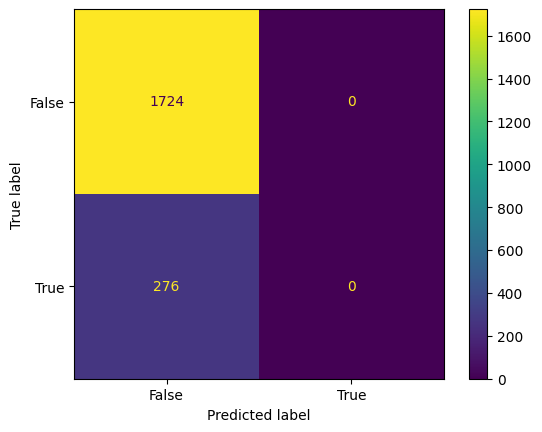

In [17]:
pred = model.predict(val_images)

confusion_matrix = metrics.confusion_matrix(val_labels, pred.round())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


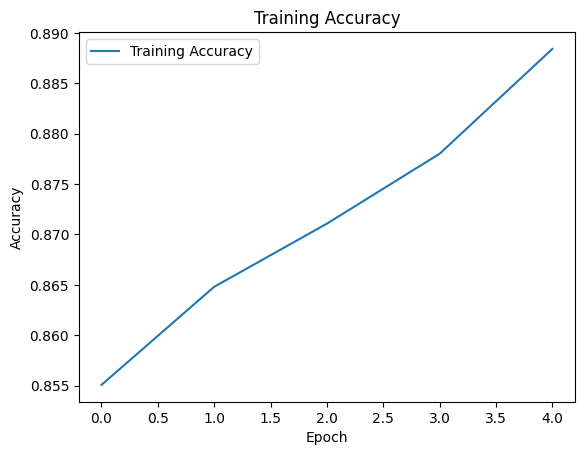

In [20]:
plt.plot(cnn.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()